In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url='file:///C:/Users/wtime/Downloads/팀%20타격메인기록%20_%20KBReport.html'
tables = pd.read_html(url, index_col=1) #1번째 컬럼이 인데스타
len(tables)

1

In [26]:
baseball = tables[0]

In [27]:
baseball.shape


(11, 20)

In [28]:
data = baseball.iloc[:-1]

In [29]:
data.head(1)

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.7,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69


In [30]:
data.info() #object를 점검합니다. : 승률, 기대승률

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 20 columns):
#        10 non-null float64
경기       10 non-null int64
승        10 non-null int64
무        10 non-null int64
패        10 non-null int64
승률       10 non-null object
기대승률     10 non-null object
R/G      10 non-null float64
득점       10 non-null int64
홈런       10 non-null int64
도루       10 non-null int64
볼넷%      10 non-null float64
삼진%      10 non-null float64
BABIP    10 non-null float64
타율       10 non-null float64
출루율      10 non-null float64
장타율      10 non-null float64
OPS      10 non-null float64
wOBA     10 non-null float64
WAR      10 non-null float64
dtypes: float64(11), int64(7), object(2)
memory usage: 1.6+ KB


In [31]:
# warning 떠서 API로 대체 합니다.
#data['승률'] = data['승률'].astype('float') # 타입 변경 후 write
#data['기대승률'] = data['기대승률'].astype('float')
data.loc[:,'승률'] = data['승률'].astype('float') # 타입 변경 후 write
data.loc[:,'기대승률'] = data['기대승률'].astype('float')

- 승률을 bar 그래프로 표현하기
- 승률과 홈런의 관계는?
- 팁별 득점 점수
- 나의 홈팀과 가장 유사한 성격의 팀을 찾아라

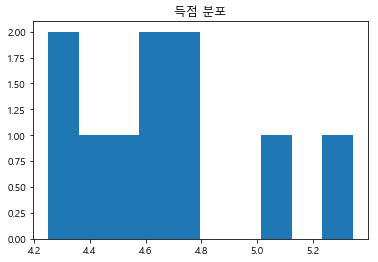

In [58]:
h = plt.title("득점 분포")
h = plt.hist(data.득점/data.경기, bins=10)

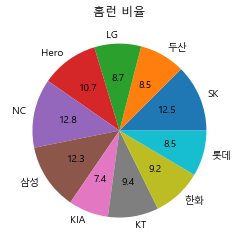

In [54]:
plt.title("홈런 비율")
p = plt.pie(data.홈런, labels=data.index, autopct='%.1f')

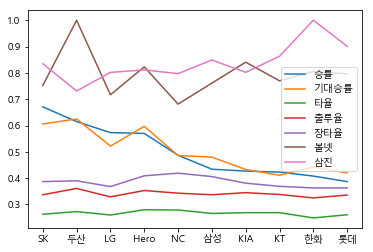

In [49]:
# % 승률, 기대승률, 타율, 출루율, 장타율
col = ['승률', '기대승률', '타율', '출루율', '장타율']
for c in col:
    plt.plot(data.index, data[c], label=c)

plt.plot(data.index, data['볼넷%']/data['볼넷%'].max(), label='볼넷')
plt.plot(data.index, data['삼진%']/data['삼진%'].max(), label='삼진')
plt.legend()


<BarContainer object of 10 artists>

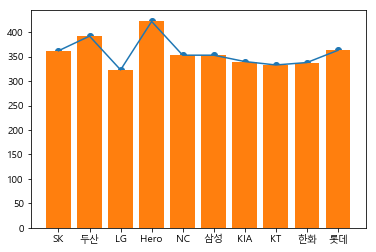

In [43]:
plt.plot(data.index, data['득점'])
plt.scatter(data.index, data['득점'])
plt.bar(data.index, data['득점'])

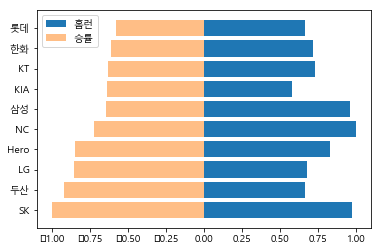

In [38]:
ㅊ
plt.barh(data.index, data['홈런']/data['홈런'].max(), label='홈런') # bar(X,Y)
plt.barh(data.index, -data['승률']/data['승률'].max(), alpha=0.5, label='승률')
plt.legend()

In [73]:
name = input("홈팀을 말하세요")
name

홈팀을 말하세요롯데


'롯데'

In [74]:
data_normal = data/data.max()

In [75]:
home = data_normal.loc[name]
# 홈팀과 다른팀과의 차이, 차이의 합이 작은 팀들을 찻습니다.
차이 = np.sum(np.square(data_normal - home), axis=1)

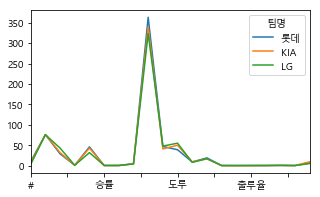

In [76]:
i = 차이.sort_values().index[:3]
data.loc[i].T.plot(figsize=(5,3))